In [1]:
import pandas as pd

import seaborn as sns

url = "https://raw.githubusercontent.com/miab199/gwc-water/refs/heads/main/Self%20Supplied%20Industrial%20Water%20Use%20in%20the%20Tennessee%20Hydrologic%20Region%202010.csv?scrlybrkr=496e2411"
df = pd.read_csv(url)
df.head()


,County,Source of supply,Principal aquifer,Groundwater withdrawal (Mgal/d),Major river basin,Surface water withdrawal (Mgal/d)
0,Anderson,Clinch River,--,--,Upper Tennessee,0.524
1,Bradley,Hiwassee River,--,--,Middle Tennessee-Hiwassee,3.81
2,Carter,Well #1 & #2,Cambrian-Ordovician carbonate,0.134,--,--
3,Cocke,Well fields,Cambrian-Ordovician carbonate,0.214,--,--
4,Coffee,Well,Mississippian carbonate,0.020,--,--


In [2]:
numRows = len(df)
print("rows: ", numRows)

numColumns = len(df.columns)
print("columns: ", numColumns)

rows:  85
columns:  6


1. How concentrated is industrial water control in the Tennessee hydrologic region, and which communities bear the greatest extraction burden?



*   Cardinal Directions
*   Rural/Suburban/Urban






2. Which industrial sectors create the highest water stress relative to their geographic footprint?

*3. Which counties are most structurally dependent on self-supplied industrial water, and what does that imply for long-term sustainability?*

In [3]:
# looking for data about nas and nans
df.isna()

#find nas (axis 1 = rows, 0 = columns)
print(df.isna().any(axis=1))
# print(df.isna().sum(axis = 0 ))

0     False
1     False
2     False
3     False
4     False
      ...  
80     True
81     True
82     True
83     True
84     True
Length: 85, dtype: bool


In [4]:
df_clean = df.dropna()
df_clean

,County,Source of supply,Principal aquifer,Groundwater withdrawal (Mgal/d),Major river basin,Surface water withdrawal (Mgal/d)
0,Anderson,Clinch River,--,--,Upper Tennessee,0.524
1,Bradley,Hiwassee River,--,--,Middle Tennessee-Hiwassee,3.81
2,Carter,Well #1 & #2,Cambrian-Ordovician carbonate,0.134,--,--
3,Cocke,Well fields,Cambrian-Ordovician carbonate,0.214,--,--
4,Coffee,Well,Mississippian carbonate,0.020,--,--
...,...,...,...,...,...,...
58,Sullivan,South Fork of Holston River,--,--,French Broad-Holston,17.3
59,Sullivan,Holston River area B,--,--,French Broad-Holston,18.9
60,Sullivan,South Fork Holston River,--,--,French Broad-Holston,58.5
61,Sullivan,South Fork Holston River,--,--,French Broad-Holston,104




* clean up NAs or NaNs (detect NAs and decide on removal)
* how much water from rivers/wells?
* how many unique aquifers?



In [5]:
df_surface = df_clean[df_clean["Groundwater withdrawal (Mgal/d)"] == "--"]
df_surface
num_surface = pd.to_numeric(df_surface["Surface water withdrawal (Mgal/d)"]).sum()
print("total surface water: ", num_surface)



total surface water:  703.7


In [6]:
df_ground = df_clean[df_clean["Surface water withdrawal (Mgal/d)"] == "--"]
df_ground
num_ground = pd.to_numeric(df_ground["Groundwater withdrawal (Mgal/d)"]).sum()
print("total ground water: ", num_ground)

total ground water:  6.4292


* **we found that there was a lot more surface water used, compared to ground water. There was 703.7 Mgal/d of surface water in total, and 6.4292 Mgal/d of ground water in total**

In [7]:
num_rows_surface = len(df_surface)
avg_surface = num_surface / num_rows_surface
print("Average surface withdrawl: ", avg_surface)

Average surface withdrawl:  21.990625


In [8]:
num_rows_ground = len(df_ground)
avg_ground = num_ground / num_rows_ground
print("Average ground withdrawl: ", avg_ground)

Average ground withdrawl:  0.20739354838709675


* **They got more water from each surface withdrawl on average than each ground withdrawl on average. They got an average of 21.9906 Mgal/d of surface water and an average of 0.2074 Mgal/d of ground water.**

In [9]:
print("number of unique surface water supply sources: ", df_surface['Source of supply'].nunique())


number of unique surface water supply sources:  20


In [10]:
print("number of unique ground water supply sources: ", df_ground['Source of supply'].nunique())


number of unique ground water supply sources:  18


* **there are 20 unique surface water sources and 18 unique ground water sources**
* **BUT not necesarilly useful/correct info because some differences seem to by typos/stylistic choices**

<Axes: title={'center': 'Groundwater withdrawl vs Supply Location'}, xlabel='Groundwater withdrawal (Mgal/d)', ylabel='Source of supply'>

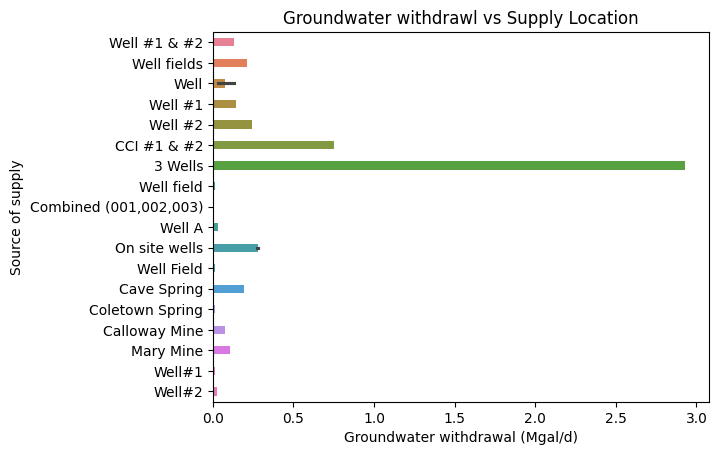

In [23]:
GW = pd.to_numeric(df_ground["Groundwater withdrawal (Mgal/d)"])
plt = sns.barplot(df_ground, y = "Source of supply", x = GW, hue = "Source of supply", gap = 0.5, native_scale = False, orient = "y")
plt.set_title("Groundwater withdrawl vs Supply Location")
plt

next:
* add for suface water
* figure out what it means